In [ ]:
!pip install ultralytics opencv-python matplotlib mediapipe

In [48]:
import cv2
from ultralytics import YOLO

import matplotlib.pyplot as plt
%matplotlib inline

import mediapipe as mp

In [49]:
image_path = 'assets/imgs/potrait-right.jpg'
img = cv2.imread(image_path)


image 1/1 /Users/iassn0rma1/Library/CloudStorage/GoogleDrive-amanbarthwal0110@gmail.com/My Drive/Programming/Projects/WG/Ai-tools/assets/imgs/potrait-right.jpg: 640x640 1 person, 201.5ms
Speed: 2.6ms preprocess, 201.5ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


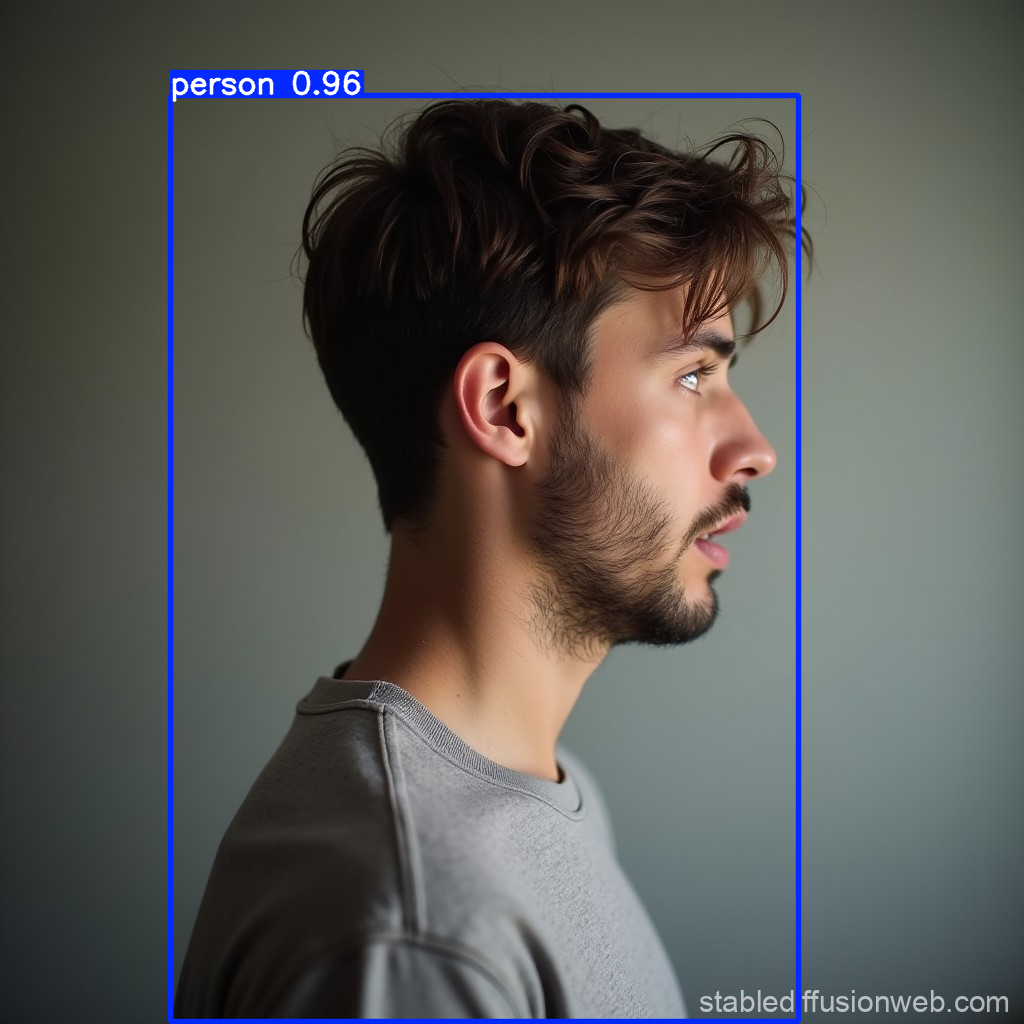

Detected: person, Confidence: 0.96, Box: [170.8627471923828, 95.8734359741211, 798.7686767578125, 1021.4766845703125]


In [50]:
model = YOLO("assets/models/yolov10s.pt")

results = model(image_path)
results[0].show()

detected_objects = results[0].boxes.xyxy  # bounding boxes (x1, y1, x2, y2)
scores = results[0].boxes.conf  # confidence scores
labels = results[0].boxes.cls  # class labels

for box, score, label in zip(detected_objects, scores, labels):
    print(f"Detected: {model.names[int(label)]}, Confidence: {score:.2f}, Box: {box.tolist()}")


In [51]:
detected_objects

tensor([[ 170.8627,   95.8734,  798.7687, 1021.4767]])

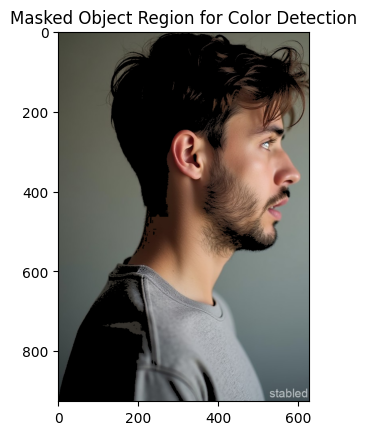

Average Color (BGR): (101, 110, 117)
Average Color (RGB): (117, 110, 101)


In [52]:
# first detected object
x1, y1, x2, y2 = detected_objects[0]

# to integer
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

# crop the object
roi = img[y1:y2, x1:x2]

# convert to HSV color space for better color identification
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_roi, (0, 0, 50), (180, 255, 255))  # Exclude dark pixels

# image mask
masked_roi = cv2.bitwise_and(roi, roi, mask=mask)

# average color of the masked region
mean_color = cv2.mean(masked_roi, mask=mask)
average_color_bgr = (int(mean_color[0]), int(mean_color[1]), int(mean_color[2]))  # BGR format
average_color_rgb = (int(mean_color[2]), int(mean_color[1]), int(mean_color[0]))  # RGB format for display

plt.imshow(cv2.cvtColor(masked_roi, cv2.COLOR_BGR2RGB))
plt.title("Masked Object Region for Color Detection")
plt.show()

print(f"Average Color (BGR): {average_color_bgr}")
print(f"Average Color (RGB): {average_color_rgb}")


I0000 00:00:1728392513.863063  164099 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1728392513.998869  174518 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728392514.010402  174519 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


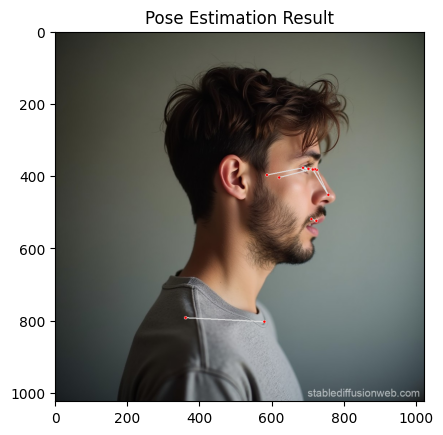

Person is likely facing right


In [53]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# pose estimation
results = pose.process(img_rgb)

if results.pose_landmarks:
    # draw on the original image
    annotated_image = img.copy()
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title("Pose Estimation Result")
    plt.show()

    # specific landmarks for pose direction estimation
    left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]

    if left_shoulder.y < right_shoulder.y:
        print("Person is likely facing left")
    else:
        print("Person is likely facing right")
else:
    print("No pose detected")
